<a href="https://colab.research.google.com/github/mozhgans/Machine-Learning-Algorithms/blob/main/Logistic_regression_using_stochastic_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Chapters 13 and 14 Logistic regression
# Log odds or logit: ln(p/(1-p))
# Representation of logistic regression model: y = exp(B0+B1*X)/(1+exp(B0+B1*X))
# Logistic regression is actually predicting the probabilities, and then transformed into a binary value (0 0r 1) to make a crisp prediction
# Coefficients of the logistic regreesion is estimated by a variety of machine learning algorithms
# Preparing data: 
#（1） Binary output variable
# (2) Remove noise:Removing outliers
# (3) Gaussian distribution: For example, you can use log, root,Box-Cox and other univariate transforms to better expose this linear relationship
# (4) Remove correlated inputs:Consider calculating the pairwise correlations between all inputs and removing highly correlated inputs.
# (5） Fail to converge: If there are many highly correlated inputs or the data is very sparse

In [2]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# import data
X1 = np.array([2.7810836,1.465489372,3.396561688,1.38807019,3.06407232,7.627531214,5.332441248,6.922596716,8.675418651,7.673756466])
X2 = np.array([2.550537003,2.362125076,4.400293529,1.850220317,3.005305973,2.759262235,2.088626775,1.77106367,-0.242068655,3.508563011])
y = np.array([0,0,0,0,0,1,1,1,1,1])

Text(0, 0.5, 'X2')

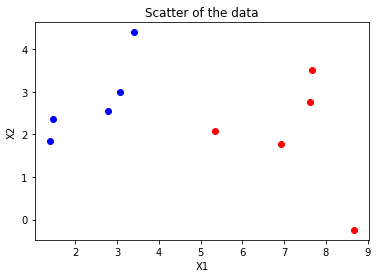

In [4]:
# visualization of data
plt.scatter(X1[0:5],X2[0:5], color='blue')
plt.scatter(X1[5:10],X2[5:10],color = "red")
plt.title('Scatter of the data')
plt.xlabel('X1')
plt.ylabel('X2')

In [5]:

# Logistic regression by stochastic gradient descent
n = 10
B0 = np.zeros(n)
B1 = np.zeros(n)
B2 = np.zeros(n)
alpha = 0.3
for i in range(0,n-1):
    y_i = 1/(1+np.exp(-(B0[i]+B1[i]*X1[i]+B2[i]*X2[i])))  #prediction
    B0[i+1] = B0[i] + alpha * (y[i]-y_i)*y_i*(1-y_i)*1
    B1[i+1] = B1[i] - alpha * (y[i]-y_i)*y_i*(1-y_i)*X1[i]
    B2[i+1] = B2[i] - alpha * (y[i]-y_i)*y_i*(1-y_i)*X2[i]
print(B0[n-1])
print(B1[n-1])
print(B2[n-1])

-0.18421481086159977
0.42247115547871716
0.5151608988402318


In [6]:
# visualizing the results, seems one epoch is not enough for learning
y1 = B0[n-1] + B1[n-1]*X1 +B2[n-1]*X2
for i in range(len(y1)):
    if y1[i]<0.5:
        y1[i]=0
    if y1[i]>=0.5:
        y1[i]=1
print(y1)
#plt.scatter(X, y, color="red")
#plt.plot(X,y1, color='blue')
#plt.title('Salary vs Experience')
#plt.xlabel('year of experience')
#plt.ylabel('salary')
#plt.show

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:

# Using sklearn model to implement logistic regression
from sklearn.linear_model import LogisticRegression
X = np.transpose(np.array([X1,X2]))
clf = LogisticRegression(random_state=0).fit(X,y)
clf.score(X,y)

1.0